In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.discrete.discrete_model import Probit
from sklearn.model_selection import train_test_split


In [2]:
np.random.seed(0)

N = 1000000
p = 10 # dimension of features

- data:

In [3]:
X = np.random.randn(N, p)
X[:, 0] = 1                              # set to be constants
beta0 = np.ones(p)
Y_true = (X.dot(beta0) > 0).astype(int)
Y_true.mean()

0.63099

In [4]:
sigma0_list = [1, 10, 0.02]
M = len(sigma0_list)  # number of annotators

## First-Round Sampling

In [5]:
X1, X2, Y1_true, Y2_true = train_test_split(X, Y_true, random_state=0, test_size=0.999)
n = X1.shape[0]; print(f"first-round size: {n}")

first-round size: 1000


## stack $M$ annotations to create a new dataset

In [6]:
# X1_stack = np.concatenate([X1 / sigma for sigma in sigma0_list], axis=0)
X1_stack_list = []
Y1_stack_list = []
for m in range(M):
    sigma_0m = sigma0_list[m]
    epsilon_m = np.random.randn(n) * sigma_0m
    Y_im = (X1.dot(beta0) + epsilon_m > 0).astype(int)
    print(f"Class1 ratio: {Y_im.mean()}")
    X1_stack_list.append(X1 / sigma_0m)
    Y1_stack_list.append(Y_im)

Class1 ratio: 0.64
Class1 ratio: 0.525
Class1 ratio: 0.637


In [7]:
X1_stack = np.concatenate(X1_stack_list, axis=0)
Y1_stack = np.concatenate(Y1_stack_list, axis=0)
X1_stack.shape

(3000, 10)

In [8]:
model = Probit(Y1_stack, X1_stack.astype(float))
probit_model = model.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.286387
         Iterations 14
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3000
Model:                         Probit   Df Residuals:                     2990
Method:                           MLE   Df Model:                            9
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.5743
Time:                        14:56:13   Log-Likelihood:                -859.16
converged:                       True   LL-Null:                       -2018.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0956      0.070     15.665      0.000       0.958       1.233
x2             1.0582      0

In [9]:
print(f"sigma: {sigma0_list}")
beta_hat = probit_model.params
mse = ((beta_hat - beta0)**2).sum()
print(f"MSE: {mse: .4f}")
Y2_pred = (X2.dot(beta_hat) > 0).astype(int)
acc = (Y2_pred == Y2_true).mean()
print(f"ACC: {acc: .4f}")

sigma: [1, 10, 0.02]
MSE:  0.0544
ACC:  0.9950


In [10]:
sigma0_list = [1, 10, 0.02]
sigmam_list = [0.01, 0.02]
M = len(sigma0_list)  # number of annotators

repetition = 100
results = []

for seed in range(repetition):
    np.random.seed(seed)
    for sigma_m in sigmam_list: #np.arange(start=0.01, stop=0.1, step=0.01):
        sigma0_list[2] = sigma_m

        X1_stack_list = []
        Y1_stack_list = []
        for m in range(M):
            sigma_0m = sigma0_list[m]
            epsilon_m = np.random.randn(n) * sigma_0m
            Y_im = (X1.dot(beta0) + epsilon_m > 0).astype(int)
    #         print(f"Class1 ratio: {Y_im.mean()}")
            X1_stack_list.append(X1 / sigma_0m)
            Y1_stack_list.append(Y_im)
        X1_stack = np.concatenate(X1_stack_list, axis=0)
        Y1_stack = np.concatenate(Y1_stack_list, axis=0)
        model = Probit(Y1_stack, X1_stack.astype(float))
        probit_model = model.fit()
        
        beta_hat = probit_model.params
        mse = ((beta_hat - beta0)**2).sum()
        Y2_pred = (X2.dot(beta_hat) > 0).astype(int)
        acc = (Y2_pred == Y2_true).mean()
        print(f"{sigma_m}:\tMSE: {mse: .4f}\tACC: {acc: .4f}")
        
        results.append([seed, sigma_m, mse, acc])

Optimization terminated successfully.
         Current function value: 0.287391
         Iterations 19
0.01:	MSE:  0.0224	ACC:  0.9955
Optimization terminated successfully.
         Current function value: 0.275536
         Iterations 15
0.02:	MSE:  0.4422	ACC:  0.9942
Optimization terminated successfully.
         Current function value: 0.282882
         Iterations 19
0.01:	MSE:  0.1104	ACC:  0.9927
Optimization terminated successfully.
         Current function value: 0.290179
         Iterations 14
0.02:	MSE:  0.0086	ACC:  0.9936
Optimization terminated successfully.
         Current function value: 0.291749
         Iterations 17
0.01:	MSE:  0.0037	ACC:  0.9941
Optimization terminated successfully.
         Current function value: 0.291507
         Iterations 14
0.02:	MSE:  0.0033	ACC:  0.9966
Optimization terminated successfully.
         Current function value: 0.292075
         Iterations 18
0.01:	MSE:  0.0108	ACC:  0.9895
Optimization terminated successfully.
         Current 

0.02:	MSE:  0.0065	ACC:  0.9952
Optimization terminated successfully.
         Current function value: 0.291295
         Iterations 18
0.01:	MSE:  0.0024	ACC:  0.9950
Optimization terminated successfully.
         Current function value: 0.293537
         Iterations 14
0.02:	MSE:  0.0028	ACC:  0.9952
Optimization terminated successfully.
         Current function value: 0.285389
         Iterations 16
0.01:	MSE:  0.0544	ACC:  0.9939
Optimization terminated successfully.
         Current function value: 0.298542
         Iterations 14
0.02:	MSE:  0.0515	ACC:  0.9932
Optimization terminated successfully.
         Current function value: 0.285022
         Iterations 16
0.01:	MSE:  0.0562	ACC:  0.9945
Optimization terminated successfully.
         Current function value: 0.299406
         Iterations 14
0.02:	MSE:  0.0705	ACC:  0.9933
Optimization terminated successfully.
         Current function value: 0.286561
         Iterations 19
0.01:	MSE:  0.0430	ACC:  0.9925
Optimization terminated

0.01:	MSE:  0.0127	ACC:  0.9966
Optimization terminated successfully.
         Current function value: 0.289729
         Iterations 14
0.02:	MSE:  0.0139	ACC:  0.9953
Optimization terminated successfully.
         Current function value: 0.287791
         Iterations 16
0.01:	MSE:  0.0285	ACC:  0.9936
Optimization terminated successfully.
         Current function value: 0.298750
         Iterations 14
0.02:	MSE:  0.0597	ACC:  0.9934
Optimization terminated successfully.
         Current function value: 0.292095
         Iterations 17
0.01:	MSE:  0.0032	ACC:  0.9950
Optimization terminated successfully.
         Current function value: 0.298812
         Iterations 15
0.02:	MSE:  0.0494	ACC:  0.9927
Optimization terminated successfully.
         Current function value: 0.298575
         Iterations 19
0.01:	MSE:  0.0674	ACC:  0.9942
Optimization terminated successfully.
         Current function value: 0.293236
         Iterations 14
0.02:	MSE:  0.0030	ACC:  0.9953
         Current functi

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.290080
         Iterations 14
0.02:	MSE:  0.0075	ACC:  0.9964
Optimization terminated successfully.
         Current function value: 0.293581
         Iterations 16
0.01:	MSE:  0.0086	ACC:  0.9942
Optimization terminated successfully.
         Current function value: 0.291410
         Iterations 15
0.02:	MSE:  0.0011	ACC:  0.9966
Optimization terminated successfully.
         Current function value: 0.290924
         Iterations 16
0.01:	MSE:  0.0052	ACC:  0.9940
Optimization terminated successfully.
         Current function value: 0.294764
         Iterations 14
0.02:	MSE:  0.0119	ACC:  0.9945
Optimization terminated successfully.
         Current function value: 0.290783
         Iterations 16
0.01:	MSE:  0.0025	ACC:  0.9959
Optimization terminated successfully.
         Current function value: 0.284718
         Iterations 14
0.02:	MSE:  0.0793	ACC:  0.9959
Optimization terminated successfully.
         Current 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
results_DF = pd.DataFrame(results)
results_DF.head()

,0,1,2,3
0,0,0.01,0.022398,0.995505
1,0,0.02,0.442217,0.994171
2,1,0.01,0.110362,0.992681
3,1,0.02,0.008605,0.993573
4,2,0.01,0.003706,0.994131


[]

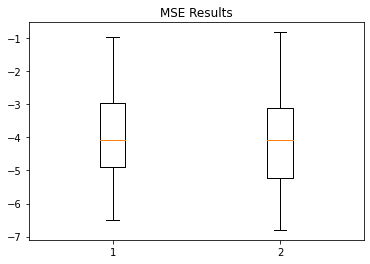

In [12]:
mse_data = []
for sigma in sigmam_list:
    mse_data.append(np.log(results_DF.loc[results_DF[1] == sigma, 2]))
plt.boxplot(mse_data)
plt.title("MSE Results")
plt.plot()

[]

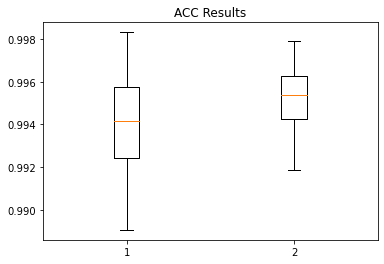

In [13]:
acc_data = []
for sigma in sigmam_list:
    acc_data.append((results_DF.loc[results_DF[1] == sigma, 3]))
plt.boxplot(acc_data)
plt.title("ACC Results")
plt.plot()

[]

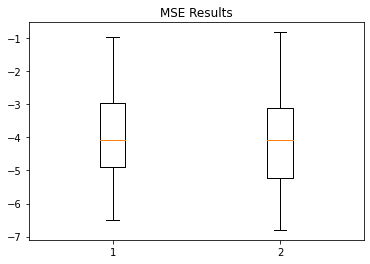

In [14]:
plt.boxplot(mse_data)
plt.title("MSE Results")
plt.plot()

In [15]:
results_DF.to_csv("/Users/helenology/Desktop/test.csv")